In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# algo and estimators
import statsmodels.regression.linear_model as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [25]:
df  = pd.read_csv('../../datasets/house_pricing.csv')
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


Correlation - find most related columns for prediction

In [26]:
df.describe(include='all')

,City,Type,Beds,Baths,SquareFeet,Price
count,814,814,814.000000,814.000000,814.000000,814.000000
unique,36,3,NaN,NaN,NaN,NaN
top,SACRAMENTO,Residential,NaN,NaN,NaN,NaN
freq,424,759,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.244472,1.960688,1591.146192,239650.063882
std,NaN,NaN,0.852137,0.669804,663.841930,97549.832306
min,NaN,NaN,1.000000,1.000000,484.000000,11985.000000
25%,NaN,NaN,3.000000,2.000000,1144.000000,173096.635000
50%,NaN,NaN,3.000000,2.000000,1418.500000,215468.525000
75%,NaN,NaN,4.000000,2.000000,1851.000000,276800.187500


In [27]:
city_henc = OneHotEncoder(drop='first')
type_henc = OneHotEncoder(drop='first')
city_dummies = city_henc.fit_transform(df[['City']]).toarray()
type_dummies = type_henc.fit_transform(df[['Type']]).toarray()

In [28]:
y = df['Price']

In [29]:
df.drop(labels=['City','Type','Price'],axis=1,inplace=True)

In [30]:
df

,Beds,Baths,SquareFeet
0,2,1,836
1,3,1,1167
2,2,1,796
3,2,1,852
4,2,1,797
...,...,...,...
809,4,3,2280
810,3,2,1477
811,3,2,1216
812,4,2,1685


In [31]:
b0 =np.ones((df.shape[0],1))

In [32]:
X = np.concatenate((b0,type_dummies,city_dummies,df),axis=1)
X.shape

(814, 41)

In [33]:
newdf = pd.DataFrame(X)
newdf['price']= y
newdf.head(3)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,price
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,836.0,138159.85
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1167.0,167541.46
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,796.0,119095.12


In [34]:
city_dummies.shape

(814, 35)

<AxesSubplot:>

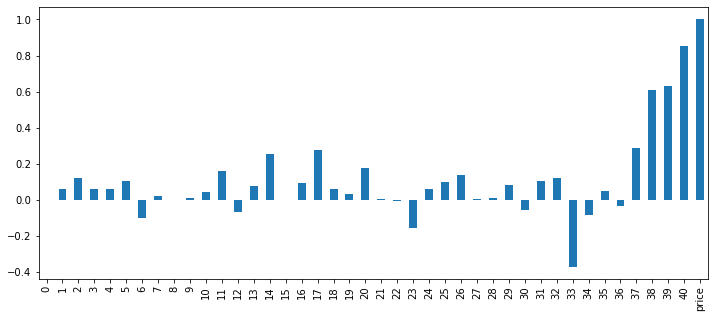

In [35]:
newdf.corrwith(newdf['price']).plot.bar(figsize=(12,5))

In [36]:
newdf.loc[:,[38,39,40]]

,38,39,40
0,2.0,1.0,836.0
1,3.0,1.0,1167.0
2,2.0,1.0,796.0
3,2.0,1.0,852.0
4,2.0,1.0,797.0
...,...,...,...
809,4.0,3.0,2280.0
810,3.0,2.0,1477.0
811,3.0,2.0,1216.0
812,4.0,2.0,1685.0


<AxesSubplot:xlabel='40', ylabel='price'>

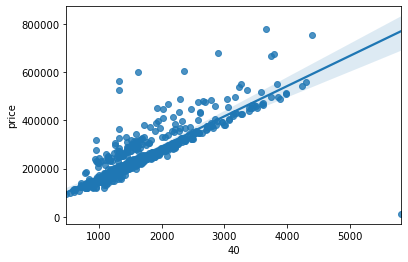

In [37]:
sns.regplot(newdf[40],newdf['price'],)

<AxesSubplot:xlabel='33', ylabel='price'>

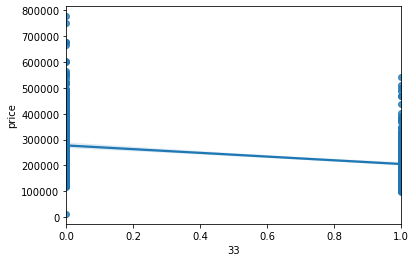

In [38]:
sns.regplot(newdf[33],newdf['price'],)

find out the best no of columns for prediction of price¶

In [45]:
X_opt = X[:,[38,39,40]] 

In [46]:
trainx, testx, trainy, testy = train_test_split(X_opt,y,test_size=.2, random_state=0)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()
model.fit(trainx,trainy)
score = model.score(testx,testy) * 100
print(score)

87.78990122184246


In [49]:
ypred = model.predict(X_opt)

In [50]:
newdf['Predict-price'] = ypred

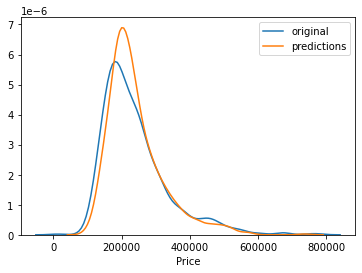

In [54]:
sns.distplot(y,hist=False,label='original')
sns.distplot(ypred, hist=False,label='predictions')
plt.legend()
plt.show()

In [55]:
def save_model(path,model):
    with open(path,'wb') as f:
        pickle.dump(model,f)
    return path

In [59]:
save_model('../../models/house_pricing_prediction.pkl',model)

'../../models/house_pricing_prediction.pkl'